# Heart Disease Project

# The following notebook will be used to predict whether or not a patient has heart disease based on their medical attributes.
Link to dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [199]:
# Importing the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [200]:
# Define constants for Notebook
SAVE_DATA = True
HEADER_NAMES = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [201]:
df_1 = pd.read_csv("processed.va.data", header=None, sep=',', names=HEADER_NAMES, na_values='?')
df_2 = pd.read_csv("processed.switzerland.data", header=None, sep=',', names=HEADER_NAMES, na_values='?')
df_3 = pd.read_csv("processed.hungarian.data", header=None, sep=',', names=HEADER_NAMES, na_values='?')
df_4 = pd.read_csv("processed.cleveland.data", header=None, sep=',', names=HEADER_NAMES, na_values='?')

df_unclean = pd.concat([df_1, df_2, df_3, df_4])

## Save data
if SAVE_DATA:
    df_unclean.to_csv("heart_disease_unclean.csv", index=False)

## Data Exploration

In [1]:
df_unclean.head("heart_categorical.csv")

NameError: name 'df_unclean' is not defined

## Data Cleaning

In [203]:
df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 107.8 KB


In [204]:
df_unclean.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [205]:
df_unclean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


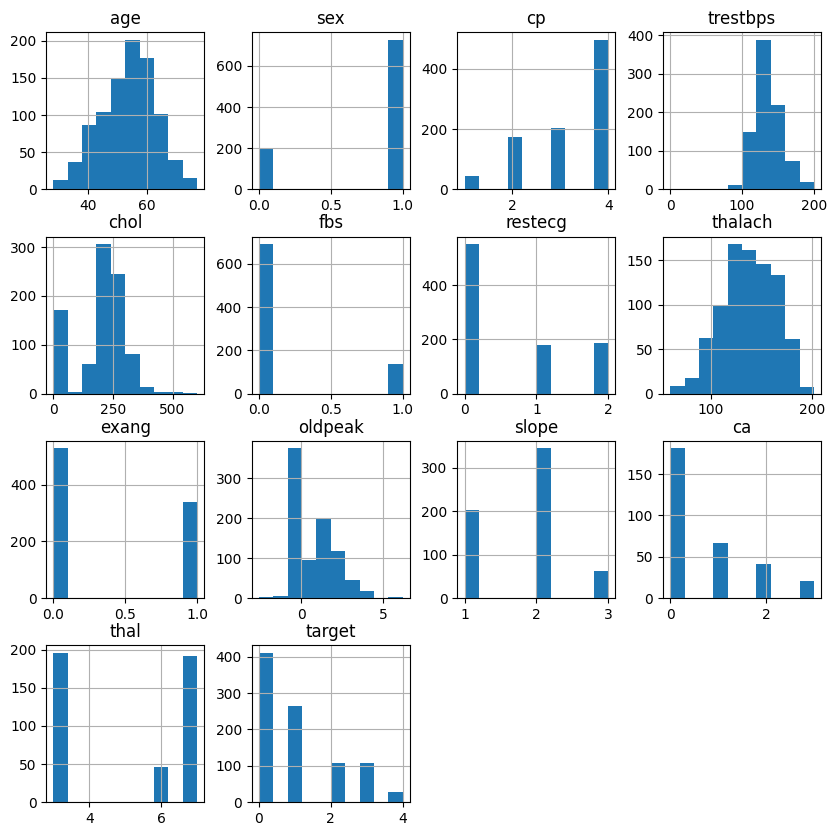

In [206]:
df_unclean.hist(figsize=(10, 10))
plt.show()

### Replace missing values using sklearn's SimpleImputer

In [245]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df_unclean)
df_clean = pd.DataFrame(imputer.transform(df_unclean), columns=df_unclean.columns)

In [246]:
df_clean.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Save cleaned data

In [247]:
if SAVE_DATA:
    df_clean.to_csv("heart_disease_clean.csv", index=False)

## Data analysis

### Correlation matrix

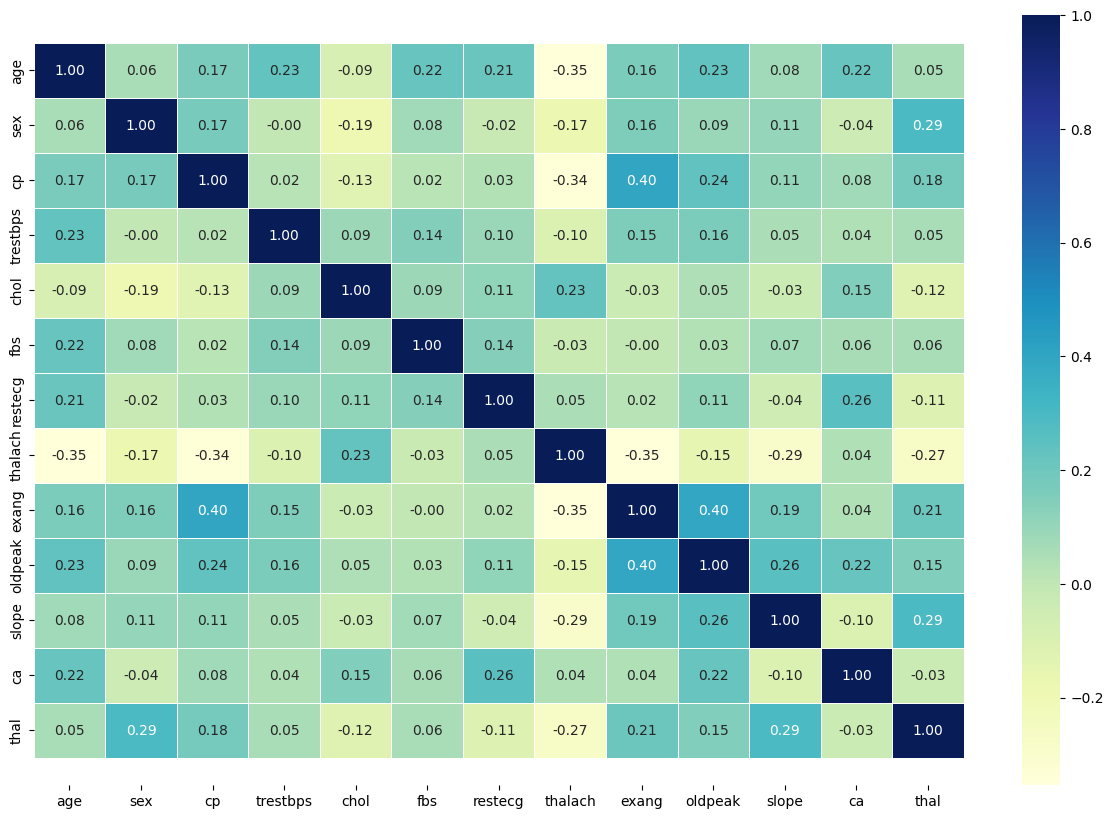

In [248]:
## Correlation matrix without target
corr_matrix = df_clean.drop('target', axis=1).corr()
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

### Pearson correlation test

In [249]:
corr_matrix = df_clean.drop('target', axis=1).corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,0.056889,0.166245,0.230784,-0.086010,0.219915,0.213651,-0.349715,0.160910,0.233550,0.077087,0.219413,0.053202
sex,0.056889,1.000000,0.170392,-0.002145,-0.194029,0.075370,-0.016442,-0.174590,0.155204,0.090794,0.105805,-0.037847,0.293586
cp,0.166245,0.170392,1.000000,0.024388,-0.131964,0.021265,0.032288,-0.338965,0.401888,0.235356,0.110992,0.079447,0.182801
trestbps,0.230784,-0.002145,0.024388,1.000000,0.089484,0.143709,0.095434,-0.104747,0.153835,0.161217,0.050446,0.039092,0.054548
chol,-0.086010,-0.194029,-0.131964,0.089484,1.000000,0.089316,0.112681,0.226047,-0.033914,0.047454,-0.033221,0.152514,-0.117764
fbs,0.219915,0.075370,0.021265,0.143709,0.089316,1.000000,0.142750,-0.026472,-0.003475,0.034112,0.070830,0.061260,0.057686
restecg,0.213651,-0.016442,0.032288,0.095434,0.112681,0.142750,1.000000,0.052745,0.021583,0.111521,-0.043313,0.257590,-0.114473
thalach,-0.349715,-0.174590,-0.338965,-0.104747,0.226047,-0.026472,0.052745,1.000000,-0.354173,-0.149401,-0.289251,0.038207,-0.270029
exang,0.160910,0.155204,0.401888,0.153835,-0.033914,-0.003475,0.021583,-0.354173,1.000000,0.395650,0.193716,0.037478,0.205758
oldpeak,0.233550,0.090794,0.235356,0.161217,0.047454,0.034112,0.111521,-0.149401,0.395650,1.000000,0.256223,0.218412,0.152280


## Data Modelling

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [288]:
X = df_clean.drop('target', axis=1)
y = df_clean['target']

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [294]:
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(max_iter=5000))])

In [295]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=5000))])

In [296]:
y_preds = pipe.predict(X_test)

In [297]:
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds, average='micro')}")
print(f"Recall: {recall_score(y_test, y_preds, average='micro')}")
print(f"F1: {f1_score(y_test, y_preds, average='micro')}")

Accuracy: 56.88%
Precision: 0.5688405797101449
Recall: 0.5688405797101449
F1: 0.5688405797101449


## Model Tuning

In [271]:
from sklearn.model_selection import GridSearchCV

In [272]:
# Create a grid of hyperparameters
grid = {'model__C': np.logspace(-4, 4, 20),
        'model__solver': ['liblinear']}

In [273]:
# Tune the model
gs_log_reg = GridSearchCV(pipe, grid, cv=5, verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'model__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'model__solver': ['liblinear']},
             verbose=True)

In [274]:
gs_log_reg.best_params_

{'model__C': 0.012742749857031334, 'model__solver': 'liblinear'}

In [275]:
y_preds = gs_log_reg.predict(X_test)

In [276]:
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds, average='micro')}")
print(f"Recall: {recall_score(y_test, y_preds, average='micro')}")
print(f"F1: {f1_score(y_test, y_preds, average='micro')}")

Accuracy: 57.25%
Precision: 0.572463768115942
Recall: 0.572463768115942
F1: 0.572463768115942


## Model Evaluation

### Confusion matrix

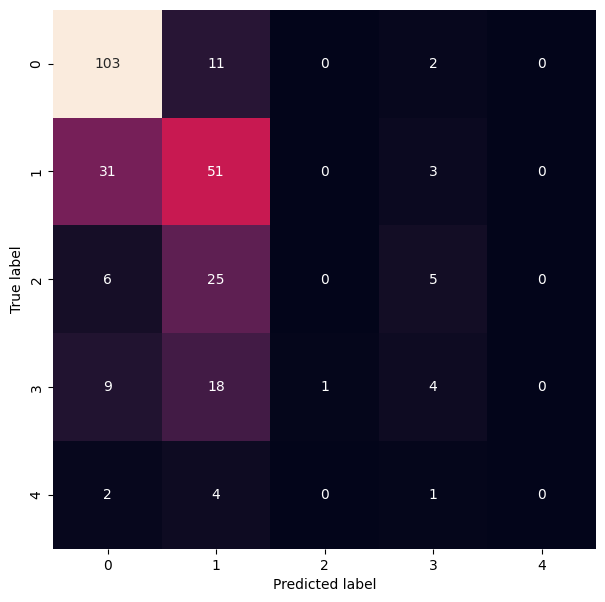

In [279]:
cf = confusion_matrix(y_test, y_preds)

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cf,
                 annot=True,
                 cbar=False,
                 fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Classification report

In [278]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77       116
         1.0       0.47      0.60      0.53        85
         2.0       0.00      0.00      0.00        36
         3.0       0.27      0.12      0.17        32
         4.0       0.00      0.00      0.00         7

    accuracy                           0.57       276
   macro avg       0.28      0.32      0.29       276
weighted avg       0.46      0.57      0.51       276



D:\university\heart-disease\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\university\heart-disease\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\university\heart-disease\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
